# Byte Pair Encoding

In [372]:
from collections import Counter,defaultdict
from tqdm import tqdm

def mostfrequentpair(corpus):
    #print(len(corpus))
    pairs = defaultdict(int)
    for word, freq in corpus.items():
        symbols = word.split()
        for i in range(len(symbols) - 1):
            pairs[symbols[i], symbols[i + 1]] += freq
    if not pairs:
        return None, None, None
    most_frequent_pair = max(pairs, key=pairs.get)
    return most_frequent_pair[0], most_frequent_pair[1], pairs[most_frequent_pair]


In [373]:
def replace(tl, tr, corpus, tnew):
    new_corpus = {}
    for token_seq, freq in corpus.items():
        # Replace occurrences of tl followed by tr with tnew
        new_token_seq = token_seq.replace(tl + ' ' + tr, tnew)
        new_corpus[new_token_seq] = freq
    return new_corpus

In [374]:
def Bytepairencoding(c,num_merges):
    # Initialize vocabulary with words and frequencies
    words = c.split()
    corpus = {' '.join(word) + ' _': words.count(word) for word in set(words)}
    #print(words)
    #print(corpus)
    # Collect all unique characters in the corpus, including end-of-word token
    vocab = {'_'}|set(c.replace(" ", "")) 
    vocab_sizes = [len(vocab)]
    merge_frequencies=[]
    #print(vocab)
    for i in tqdm(range(num_merges), desc="Merging pairs"):
        tl,tr,pair_freq=mostfrequentpair(corpus)
        #print('-------------------------------------------------')
        if tl is None or tr is None:
            print("No more pairs to merge.")
            break
        tnew=tl+tr
        #print(tnew)
        vocab.add(tnew)
        #print(vocab)
        corpus=replace(tl,tr,corpus,tnew)
        # Track vocabulary size over iterations
        vocab_sizes.append(len(vocab))
        merge_frequencies.append((tnew, pair_freq))
        #print(corpus)
        #print('-------------------------------------------------')
    return vocab,vocab_sizes,merge_frequencies

# Train on NLTK Dataset 

In [375]:
import nltk
from nltk.corpus import gutenberg
import string

In [376]:
# Download NLTK data if not already downloaded
#nltk.download('gutenberg')

# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation
    text_no_punct = text.translate(str.maketrans('', '', string.punctuation))
    # Convert text to lowercase
    text_lower = text_no_punct.lower()
    return text_lower

# Function to create corpus from selected books
def create_corpus(books):
    corpus = ''
    for book_id in books:
        raw_text = gutenberg.raw(book_id)
        #print(raw_text)
        # Preprocess the text
        processed_text = preprocess_text(raw_text)
        corpus += processed_text + '\n'  # Add newline character at the end of each book
    return corpus

books = ['austen-emma.txt', 'blake-poems.txt', 'shakespeare-hamlet.txt']

# Create corpus from selected books
corpus = create_corpus(books)
#print(corpus)
# Train Byte Pair Encoding with a specific number of merges
vocab,vocab_sizes,merge_frequencies = Bytepairencoding(corpus, num_merges=10000)

# Print the vocabulary
print(vocab)


Merging pairs:  98%|████████████████████████████████████████████████████████████▉ | 9832/10000 [02:47<00:02, 58.71it/s]


No more pairs to merge.
{'downwhich_', 'selfcontent', 'condescen', 'irresolute_', 'anywhere_', 'canvassing_', 'puzzles_', 'accompaniment_', 'ch_', 'sakei_', 'probab', 'forthwith_', 'yeomanry_', 'fantasticke_', 'walking_', 'daynever_', 'loverthe_', 'oath_', 'words_', 'probablestill_', 'o_', 'engrossed_', 'read_', 'fye_', 'oxford_', 'suc', 'gifted_', 'virgin_', 'e_', 'eighte', 'street_', 'beings_', 'grove', 'louder_', 'harshly_', 'subdu', 'eighth', 'guiltlesse_', 'enli', 'unexceptionable_', 'associ', 'lewdnesse_', 'novelties_', 'provoke_', 'yorick_', 'polititian_', 'ward', 'norwey_', 'obligingbut_', 'argument_', 'suggestions_', 'dialo', 'halfhour_', 'pri', 'fortified_', 'auouch_', 'well_', 'warmhearted_', 'janeand_', 'e', 'doesfine_', 'openheartedness_', 'beginshe_', 'blindness_', 'suddenher_', 'verbal_', 'art_', 'vs_', 'exclamation_', 'dealbut_', 'forci', 'orehanging_', 'farre_', 'doomesday_', 'loath', 'pendant_', 'bestjudging_', 'seclusion_', 'dulness_', 'cy_', 'supposingthat_', 'death

In [377]:
print("Vocabulary size:",len(vocab))

Vocabulary size: 9870


# Test on NLTK Dataset

In [378]:
# Evaluation books
#evaluation_books = ['whitman-leaves.txt','shakespeare-macbeth.txt','austen-sense.txt']
evaluation_books = ['chesterton-brown.txt']
# Create evaluation corpus from selected books
evaluation_corpus = create_corpus(evaluation_books)

In [379]:
#test=evaluation_corpus[:500]
test=evaluation_corpus

In [380]:
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [381]:
def tokenize_with_bpe(text, vocab):
    words = text.split()
    tokenized_text = []
    bpe_token = {}
    for word in words:
        word_index=word
        word=word+'_'
        tokenized_word = []
        while word:
            #print(word)
            for i in range(len(word), 0, -1):
                if word[:i] in vocab:
                    tokenized_word.append(word[:i].rstrip('_'))
                    word = word[i:]
                    #print(tokenized_word)
                    break
            else:
                tokenized_word.append(word.rstrip('_'))
                break
        bpe_token[word_index]=tokenized_word
        tokenized_text.extend(tokenized_word)
    return tokenized_text,bpe_token

# Tokenize evaluation corpus
#evaluation_words = evaluation_corpus.split()
#tokenized_evaluation = tokenize_with_bpe(evaluation_corpus, vocab)
evaluation_words = test.split()
tokenized_evaluation,bpe_token = tokenize_with_bpe(test, vocab)

# Calculate coverage
covered_words = [word for word in evaluation_words if word in vocab]
coverage = (len(covered_words) / len(evaluation_words))*100

print("Coverage:", coverage)


Coverage: 41.38022505793985


In [382]:
#print(tokenized_evaluation)

In [383]:
bpe_token

{'the': ['the'],
 'wisdom': ['wisdom'],
 'of': ['of'],
 'father': ['fa', 'the', 'r'],
 'brown': ['br', 'own'],
 'by': ['by'],
 'g': ['g'],
 'k': ['k'],
 'chesterton': ['ch', 'es', 'te', 'r', 'to', 'n'],
 '1914': ['1', '9', '1', '4', ''],
 'i': ['i'],
 'absence': ['absence'],
 'mr': ['mr'],
 'glass': ['glas', 's'],
 'consultingrooms': ['cons', 'ul', 'ti', 'n', 'gr', 'oo', 'ms'],
 'dr': ['dr', ''],
 'orion': ['or', 'io', 'n'],
 'hood': ['hood'],
 'eminent': ['em', 'in', 'ent'],
 'criminologist': ['cr', 'im', 'in', 'ol', 'o', 'gi', 'st'],
 'and': ['and'],
 'specialist': ['spe', 'ci', 'al', 'is', 't'],
 'in': ['in'],
 'certain': ['certain', ''],
 'moral': ['moral'],
 'disorders': ['di', 'sor', 'de', 'rs'],
 'lay': ['la', 'y'],
 'along': ['al', 'on', 'g'],
 'seafront': ['se', 'afr', 'ont'],
 'at': ['at', ''],
 'scarborough': ['sc', 'ar', 'bo', 'rough'],
 'a': ['a'],
 'series': ['se', 'ries'],
 'very': ['very'],
 'large': ['large'],
 'welllighted': ['we', 'll', 'li', 'ght', 'ed'],
 'french':

# Create Reference Tokenization

In [384]:
import json
from nltk.tokenize import word_tokenize

In [385]:
# Tokenize using NLTK's Punkt tokenizer
def tokenize_with_punkt(corpus):
    return word_tokenize(corpus)

In [386]:
tokenized_text = tokenize_with_punkt(test)
print(tokenized_text)

['the', 'wisdom', 'of', 'father', 'brown', 'by', 'g', 'k', 'chesterton', '1914', 'i', 'the', 'absence', 'of', 'mr', 'glass', 'the', 'consultingrooms', 'of', 'dr', 'orion', 'hood', 'the', 'eminent', 'criminologist', 'and', 'specialist', 'in', 'certain', 'moral', 'disorders', 'lay', 'along', 'the', 'seafront', 'at', 'scarborough', 'in', 'a', 'series', 'of', 'very', 'large', 'and', 'welllighted', 'french', 'windows', 'which', 'showed', 'the', 'north', 'sea', 'like', 'one', 'endless', 'outer', 'wall', 'of', 'bluegreen', 'marble', 'in', 'such', 'a', 'place', 'the', 'sea', 'had', 'something', 'of', 'the', 'monotony', 'of', 'a', 'bluegreen', 'dado', 'for', 'the', 'chambers', 'themselves', 'were', 'ruled', 'throughout', 'by', 'a', 'terrible', 'tidiness', 'not', 'unlike', 'the', 'terrible', 'tidiness', 'of', 'the', 'sea', 'it', 'must', 'not', 'be', 'supposed', 'that', 'dr', 'hoods', 'apartments', 'excluded', 'luxury', 'or', 'even', 'poetry', 'these', 'things', 'were', 'there', 'in', 'their', 'p

In [387]:
# Save the tokenized results to a JSON file for later comparison
with open('reference_tokenization.json', 'w') as f:
    json.dump(tokenized_evaluation, f, indent=4)

In [388]:
print("Reference tokenization saved.")

Reference tokenization saved.


# Compare with Standard Tokenization 

In [389]:
def find_accuracy(reference, bpe):
    correct = 0
    total = len(reference)
    #bpe_set = set(bpe)  # Convert BPE token list to set for faster membership test
    for token in reference:
        #print(token,bpe[token][0])
        if token in bpe[token]:
            correct += 1
    accuracy = correct / total
    return accuracy

In [390]:
accuracy = find_accuracy(tokenized_text, bpe_token)*100
print(f"Tokenization accuracy: {accuracy:.2f}")

Tokenization accuracy: 69.51


In [391]:
def find_pre_rec_f1(reference, bpe):
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    for token in reference:
        if token in bpe:
            if token == bpe[token][0]:
                true_positives += 1
            else:
                false_negatives += 1
        else:
            false_negatives += 1
    for token in bpe:
        if bpe[token][0] not in reference_tokens:
            false_positives += 1

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    print(f"True Positives: {true_positives}")
    print(f"False Positives: {false_positives}")
    print(f"False Negatives: {false_negatives:}")
    return precision, recall, f1_score


In [392]:
precision,recall,f1_score = find_pre_rec_f1(tokenized_text, bpe_token)
print(f"Tokenization precision: {precision:.2f}")
print(f"Tokenization recall: {recall:.2f}")
print(f"Tokenization f1_score: {f1_score:.2f}")


True Positives: 49799
False Positives: 4427
False Negatives: 21842
Tokenization precision: 0.92
Tokenization recall: 0.70
Tokenization f1_score: 0.79


In [393]:
def jaccard_similarity(reference, bpe):
    # Calculate the number of common tokens
    common_tokens = len(set(reference) & set(bpe))

    # Calculate the total number of unique tokens in both sets
    total_unique_tokens = len(set(reference) | set(bpe))

    # Calculate the Jaccard similarity
    jaccard_sim = common_tokens / total_unique_tokens if total_unique_tokens > 0 else 0

    return jaccard_sim


In [394]:
jaccard_sim = jaccard_similarity(tokenized_text, tokenized_evaluation)
print(f"jaccard similarity: {jaccard_sim:.2f}")

jaccard similarity: 0.25


In [395]:
def calculate_tokenization_coverage(reference_tokens, predicted_tokens):
    # Count the number of correctly tokenized tokens
    correct_tokens = sum(1 for token in predicted_tokens if token in reference_tokens)
    
    # Calculate the tokenization coverage
    coverage = (correct_tokens / len(reference_tokens))*100 if len(reference_tokens) > 0 else 0
    
    return coverage

# Example usage:
reference_tokens = tokenized_text
predicted_tokens = tokenized_evaluation

coverage = calculate_tokenization_coverage(reference_tokens, predicted_tokens)
print("Tokenization Coverage:", coverage)


Tokenization Coverage: 93.75776440864868


# Visualization

Merging pairs:  44%|██████████████████████████▉                                  | 4423/10000 [00:23<00:29, 189.39it/s]


No more pairs to merge.


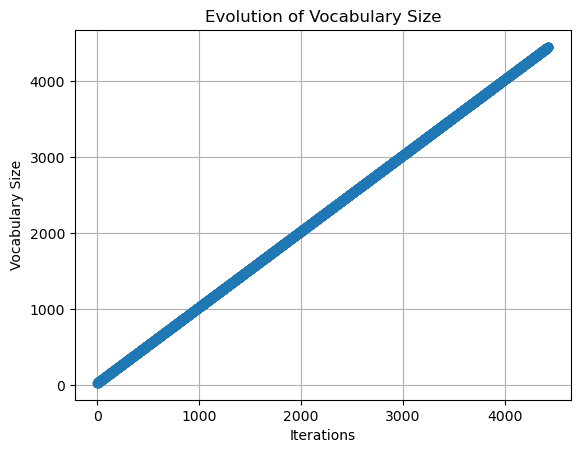

In [396]:
import matplotlib.pyplot as plt
def plot_vocabulary_evolution(vocab_sizes):
    plt.plot(range(len(vocab_sizes)), vocab_sizes, marker='o')
    plt.title('Evolution of Vocabulary Size')
    plt.xlabel('Iterations')
    plt.ylabel('Vocabulary Size')
    plt.grid(True)
    plt.show()

# Example text and number of merges
visualization_books = ['shakespeare-hamlet.txt']
visualization_corpus = create_corpus(visualization_books)
text = visualization_corpus
num_merges = 10000

# Learn BPE
vocab, vocab_sizes,merge_frequencies = Bytepairencoding(text, num_merges)

# Plot evolution of vocabulary size
plot_vocabulary_evolution(vocab_sizes)

In [397]:
def plot_merge_frequencies(merge_frequencies, max_xticks=50):
    merge_pairs = [pair for pair, freq in merge_frequencies]
    frequencies = [freq for pair, freq in merge_frequencies]
    
    merge_pairs=merge_pairs[:max_xticks]
    frequencies=frequencies[:max_xticks]
    plt.figure(figsize=(10, 6))  
    plt.plot(range(1, len(merge_pairs) + 1), frequencies, marker='o')
    plt.title('Frequency of Byte Pair Merges Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Frequency of Merges')
    #plt.yscale('log')
    plt.grid(True)
    # Mark every x tick
    plt.xticks(range(1, len(merge_pairs) + 1), rotation=90)
    # Annotate with merge pair
    for i, txt in enumerate(merge_pairs):
        plt.annotate(txt, (i + 1, frequencies[i]), xytext=(5, 5), textcoords='offset points', rotation=90)

    plt.show()


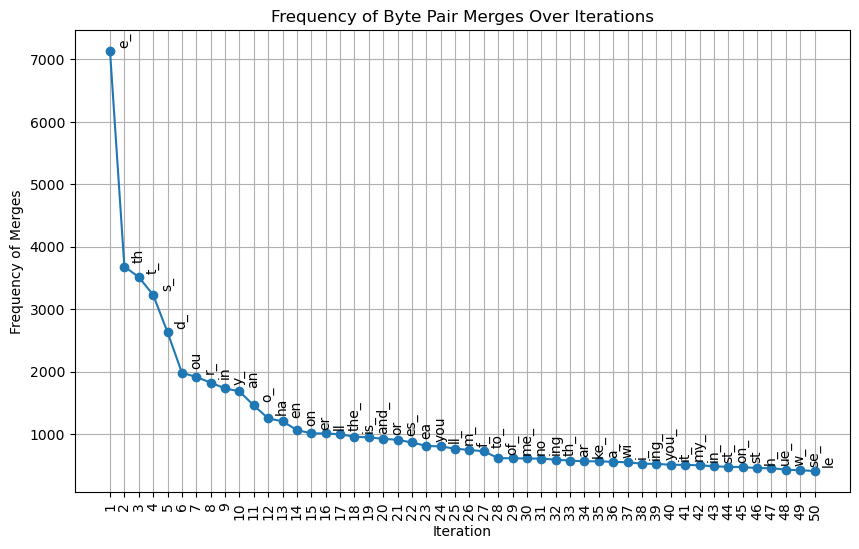

In [398]:
plot_merge_frequencies(merge_frequencies)